In [1]:
import requests
import json

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

In [3]:
user_address="1600 Amphitheatre Parkway,Mountain View,CA"
user_address

'1600 Amphitheatre Parkway,Mountain View,CA'

In [4]:
url="https://maps.googleapis.com/maps/api/geocode/json?address="+user_address+"&key=your key"

In [5]:
r=requests.get(url)
address = json.loads(r.text)

In [6]:
#address coordinates
lat=address['results'][0]['geometry']["location"]["lat"]
lon=address['results'][0]['geometry']["location"]["lng"]

In [7]:
url='http://api.openweathermap.org/data/2.5/forecast?lat='+str(lat)+'&lon='+str(lon)+'&appid=your key'
r=requests.get(url)
weather = json.loads(r.text)

In [8]:
#extracting the weather data as a data frame
df = pd.DataFrame()
for i in range(len(weather["list"])):
    df=pd.concat([df,pd.DataFrame.from_dict(weather["list"][i]['weather'][0],orient='index').transpose()])
    
    
#extract the clouds percentage
clouds=[]
for i in range(len(weather["list"])):
    clouds.append(weather["list"][i]['clouds']["all"])

df["clouds"]=clouds

#extracting the humidity
humidity=[]
for i in range(len(weather["list"])):
    humidity.append(weather["list"][i]["main"]["humidity"])

df["humidity"]=humidity

#extracting the wind speed
wind=[]
for i in range(len(weather["list"])):
    wind.append(weather["list"][i]["wind"]["speed"])

df["wind"]=wind


#extracting the tempreture
tempreture=[]
for i in range(len(weather["list"])):
    tempreture.append(weather["list"][i]["main"]["temp"])


df["tempreture"]=tempreture



# extract time and use it as index
time=np.array([])
for i in range(len(weather["list"])):
    time=np.append(time,weather["list"][i]['dt_txt'])

df=df.set_index(time) 


#droping unwanted columns
df.drop(columns=["id","icon"],inplace=True)

In [9]:
df

,main,description,clouds,humidity,wind,tempreture
2020-06-08 00:00:00,Clear,clear sky,10,41,6.67,292.30
2020-06-08 03:00:00,Clear,clear sky,4,53,3.95,289.27
2020-06-08 06:00:00,Clear,clear sky,1,66,1.68,286.65
2020-06-08 09:00:00,Clear,clear sky,0,69,0.76,285.73
2020-06-08 12:00:00,Clear,clear sky,0,67,1.20,285.36
2020-06-08 15:00:00,Clear,clear sky,0,52,2.04,288.52
2020-06-08 18:00:00,Clear,clear sky,2,28,3.14,294.18
2020-06-08 21:00:00,Clear,clear sky,0,20,4.16,297.25
2020-06-09 00:00:00,Clear,clear sky,0,25,4.38,296.69
2020-06-09 03:00:00,Clear,clear sky,0,39,2.42,291.27


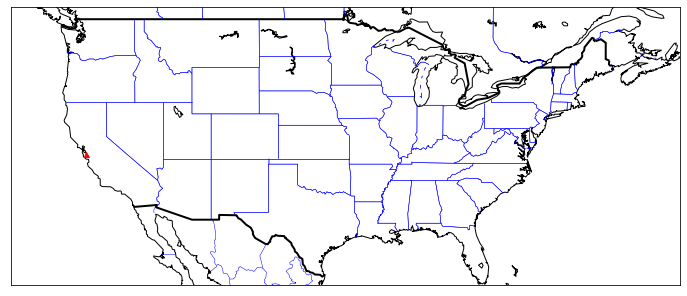

In [10]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
m = Basemap(projection='mill',
            llcrnrlat = 25,
            llcrnrlon = -130,
            urcrnrlat = 50,
            urcrnrlon = -60,
            resolution='l')

m.drawcoastlines()
m.drawcountries(linewidth=2)
m.drawstates(color='b')

LAlat, LAlon = lat, lon
xpt, ypt = m(LAlon, LAlat)
m.plot(xpt, ypt, 'r^', markersize=5)
#plt.savefig('../plots/word_count.png', dpi=235);

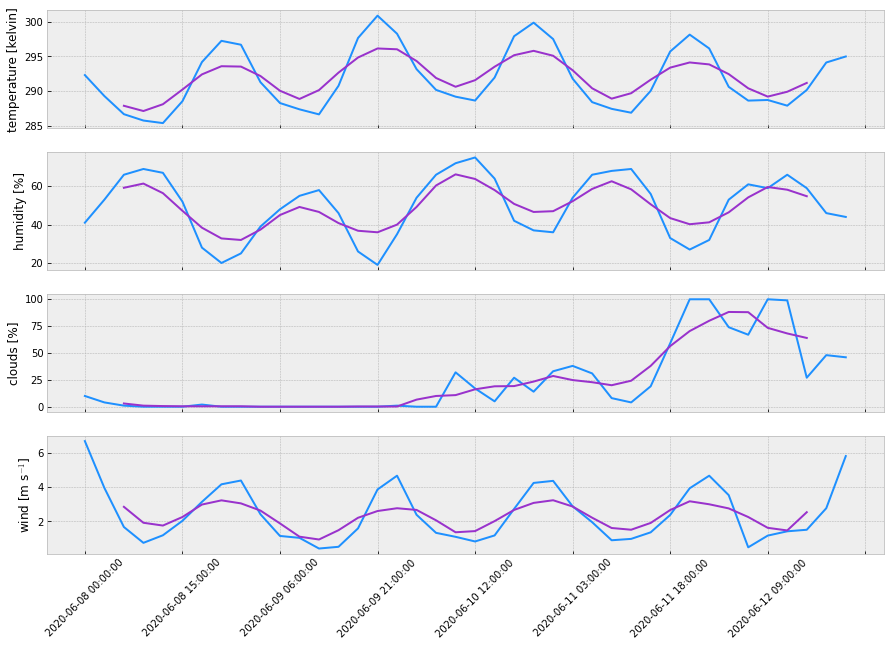

In [11]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
 
tmean=df['tempreture'].rolling(5,center=True).mean()
rhmean =df['humidity'].rolling(5,center=True).mean()
wspdmean=df['wind'].rolling(5,center=True).mean()
cldsmean =df['clouds'].rolling(5,center=True).mean()

 
matplotlib.style.use('bmh')
 
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 10))
 
df['tempreture'].plot(ax=axes[0], color='dodgerblue',sharex=True)
tmean.plot(ax=axes[0], kind='line',color='darkorchid', sharex=True)
axes[0].set_ylabel('temperature [kelvin]')
 
df['humidity'].plot(ax=axes[1], color='dodgerblue',sharex=True)
rhmean.plot(ax=axes[1], kind='line',color='darkorchid', sharex=True)
axes[1].set_ylabel('humidity [%]')
 
df['clouds'].plot(ax=axes[2], color='dodgerblue',sharex=True)
cldsmean.plot(ax=axes[2], kind='line',color='darkorchid', sharex=True)
axes[2].set_ylabel('clouds [%]')
 
df['wind'].plot(ax=axes[3], color='dodgerblue',sharex=False)
wspdmean.plot(ax=axes[3], kind='line',color='darkorchid', sharex=True)
axes[3].set_ylabel('wind [m s$^{-1}$]')
plt.xticks(rotation=45);

## Calculating the solar energy generation 

In [ ]:
a=[]
for i in df.index:
    
    if (int(i[11:13])>=6) &(int(i[11:13])<=18):
        a.append(0.9)
    elif(int(i[11:13])>18) &(int(i[11:13])<23):
        a.append(0.1)
    else:
        a.append(0)

In [37]:
#calcualting the solar energy production based on the rule of thumb
n=3           #number of solar panel detected
area=n*6*1.65 #in squared meter
energy_produced=0.1*area          #the solar energy in kw
df["hourley_energy"]= (100-df["clouds"])*energy_produced*0.2*a      #hourley produced based on weather situation

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 <a list of 11 Text major ticklabel objects>)

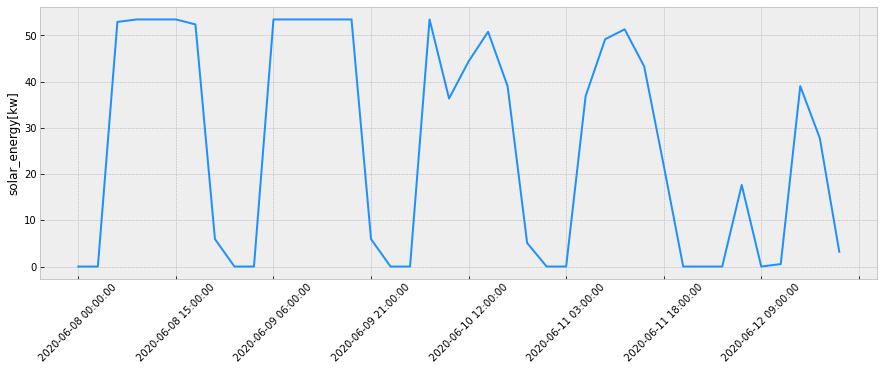

In [38]:
#plot the hourley soalr panel energy generation 
plt.figure(figsize=(15,5))
df['hourley_energy'].plot(color='dodgerblue',sharex=True).set_ylabel('solar_energy[kw]')
plt.xticks(rotation=45)